# P1 - Experience with Pandas



In this project, you will be working with the Climate Data set:  
http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt 

Be sure to investigate and understand the data, format, and descriptions provided.



### Autograder Setup

The next code cell should be uncommented to run the autograder tests when using Colab/DeepNote. If you are using an environment with `otter-grader` already installed (your own machine, lab machines), then do not uncomment the code.

In [41]:
# !pip install otter-grader

You will have access to a few tests for the project.  Note, when you submit the autograder will run additional "hidden" tests on your solutions. 

Please comment out this cell before submitting. 

In [42]:
# !wget https://pages.mtu.edu/~lebrown/un5550-f22/projects/p1/p1.files.zip
# !unzip p1.files.zip

### Project Setup 

You should use the following libraries to complete this assignment:

In [43]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import legend

import os
import otter
grader = otter.Notebook()

## 1. (8 pts) Get the Data

Read in the data from the link provided.  



### 1A. Load the data

Write a function to read in the data to a DataFrame object, print the number of rows, columns, and data types of each column using a print statement.

Make sure to use the same column names as given in the data, but replacing ' ' with '_'.
    
*Hint: Column names should be coded as `Date_Number`, `Year`, `Month`, `Day`, `Day_of_Year`, `Anomaly`.*

In [44]:
def p1_q1a(url, column_names=None, skip_row=None, separator=','):
    '''
    - Description - 
    Read in data from URL to a DataFrame object 
    Report the number of rows and columns with a print statement.
    Addtionally, print the data types of each column
    Use pandas.read_csv(...):
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

    - Inputs - 
    url: location of dataset file, filepath_or_buffer
    column_names: list of column names to add to DataFrame (default is None)
    skip_rows: number of header rows to skip in dataset file (default is None)
    separator: delimiter to use (default is a comma)

    - Outputs - 
    df: return object is a DataFrame

    - Print Statements you may use - 
    print("Number of Rows: ...")
    print("Number of Columns: ...")
    print("Column Data Types:")
    print(Data Types)
    '''

    df = pd.read_csv(url, names=column_names, skiprows= skip_row, sep=separator) 
    print("Number of Rows: " + str(df.axes[0]))
    print("Number of Columns: " + str(df.axes[1]))
    print("Column Data Types:", df.dtypes)
    # print(df.dtypes())
    return df


url = 'http://berkeleyearth.lbl.gov/auto/Global/Complete_TAVG_daily.txt'
cnames = ['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly']
skipRows = 23
separator = '\s+'


climate = p1_q1a(url, cnames, skipRows, separator)
climate.head()

Number of Rows: RangeIndex(start=0, stop=51865, step=1)
Number of Columns: Index(['Date_Number', 'Year', 'Month', 'Day', 'Day_of_Year', 'Anomaly'], dtype='object')
Column Data Types: Date_Number    float64
Year             int64
Month            int64
Day              int64
Day_of_Year      int64
Anomaly        float64
dtype: object


,Date_Number,Year,Month,Day,Day_of_Year,Anomaly
0,1880.001,1880,1,1,1,-0.534
1,1880.004,1880,1,2,2,0.841
2,1880.007,1880,1,3,3,0.366
3,1880.010,1880,1,4,4,1.280
4,1880.012,1880,1,5,5,0.623


In [45]:
grader.check("p1_q1a")

p1_q1a results: All test cases passed!

<!-- BEGIN QUESTION -->

### 1B. Understand the Data

What are the column names and what do they correspond to? *Use this Markdown cell to describe each succinctly (< 15 words per column)*

* `Date_Number` is a specific temperature measured in the specific date number.
* `Year` is a specific temperature measured in the specific year.
* `Month` is a specific temperature measured in the specific month.
* `Day` is a specific temperature measured in the specific day.
* `Day_of_Year` is a specific temperature measured in the specific day of the year.
* `Anomaly` is the specific temperature devation measured in specific date number.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 2. (2 pts) Add to the Data

Add a new column to your DataFrame. 

The new column `Temp` adds the anomaly information to the estimated average temperature given in the data. 

In [46]:
# Create new column "Temp" 
climate['Temp']=climate.loc[:,'Anomaly']
climate['Temp'].mean()

0.10538821941579099

In [47]:
grader.check("p1_q2")

p1_q2 results: All test cases passed!

<!-- END QUESTION -->

## 3. (30 pts) Calculate and report statistics. 
Pandas DataFrames have several methods for manipulation, aggregation, and calculation of meaningful statistics. The [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) is very helpful to understand attributes and methods. Matplotlib [pyplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html) integrates well with both pandas DataFrames and numpy arrays for visualization tasks.

### 3A. Calculate the mean anomaly by year. 
Create an `Int64Index` of `years` and an array of corresponding `mean_anomaly_year` holding the mean anomaly for each year.   
*Hint: Use methods like `.groupby()` and `.mean()` to get the proper data, then use the `.keys()` method to get an index, and `.values` for an array.*

In [48]:
years = climate.groupby('Year')['Anomaly'].mean().keys()
mean_anomaly_year = climate.groupby('Year')['Anomaly'].mean().values
print('Years index:\n', years[0:5])
print('Means array:\n', mean_anomaly_year[0:5])

Years index:
 Int64Index([1880, 1881, 1882, 1883, 1884], dtype='int64', name='Year')
Means array:
 [-0.53791257 -0.29586301 -0.44302192 -0.51269863 -0.78113661]


In [49]:
grader.check("p1_q3a")

p1_q3a results: All test cases passed!

### 3B. Calculate the mean temp by year.

Create an array of `mean_temp_year` holding the mean temperature for each year.

In [50]:
mean_temp_year = climate.groupby('Year')['Anomaly'].mean()

print(mean_temp_year[0:5])

Year
1880   -0.537913
1881   -0.295863
1882   -0.443022
1883   -0.512699
1884   -0.781137
Name: Anomaly, dtype: float64


In [51]:
grader.check("p1_q3b")

p1_q3b results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3C. Plot `mean_temp_year` vs. `years`.
Be sure to include a plot title, x-axis label, and y-axis label. 

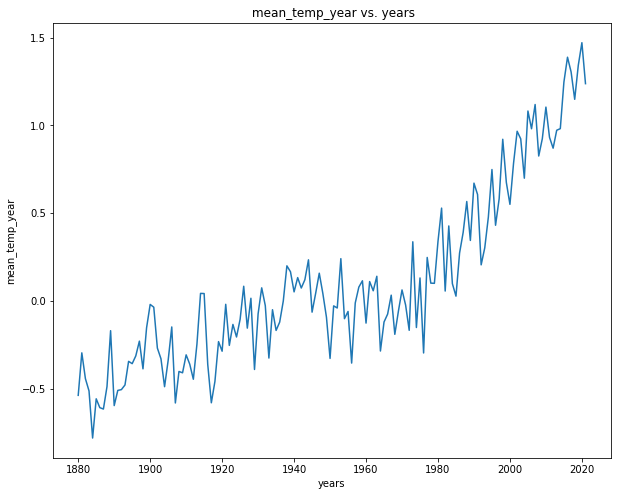

In [52]:
# Plot for each year (x-axis) vs. the "mean_temp_year" value (y-axis)

plt.figure(figsize=(10,8))
plt.plot(years,mean_temp_year);

plt.xlabel('years');
plt.ylabel('mean_temp_year');
plt.title(' mean_temp_year vs. years');


<!-- END QUESTION -->

### 3D. Calculate the mean anomaly by month
Create an `Int64Index` index of `months` and an array of `mean_anomaly_month` with the mean anomaly for each month. 

In [53]:
months = climate.groupby('Month')['Anomaly'].mean().keys()
mean_anomaly_month = climate.groupby('Month')['Anomaly'].mean().values

print('Months index:\n', months[0:5])
print('Means array:\n', mean_anomaly_month[0:5])

Months index:
 Int64Index([1, 2, 3, 4, 5], dtype='int64', name='Month')
Means array:
 [-0.027709    0.00908128  0.2470134   0.40664953  0.27707678]


In [54]:
grader.check("p1_q3d")

p1_q3d results: All test cases passed!

<!-- BEGIN QUESTION -->

### 3E. Plot mean anomaly by month in a bar chart

Be sure to include a plot title, x-axis label, y-axis label, and black horizontal line at 0 mean anomaly on the plot. This will help to visually reference positive and negative bars.

Label xticks with abbreviations for months: Jan, Feb, Mar, Apr, ...

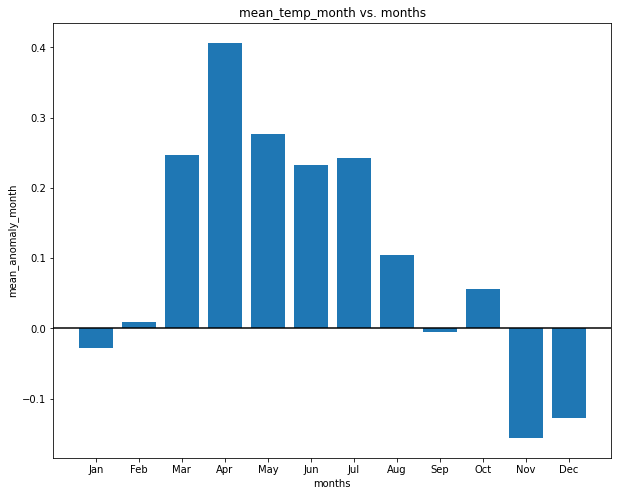

In [55]:
# Plot the mean anomaly by month vs month in a bar chart
#  Make sure there is a horizontal line for 0 mean anomaly on the plot
#  Label xticks with abbreviations for months: Jan, Feb, Mar, Apr, ...
plt.figure(figsize=(10,8))
plt.bar(months,mean_anomaly_month);
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.axhline(y = 0, color ="black")


plt.xlabel('months');
plt.ylabel('mean_anomaly_month');
plt.title('mean_temp_month vs. months');

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3F. Plot a histogram of the Anomaly data.
Be sure to include a plot title, x-axis label, and y-axis label.

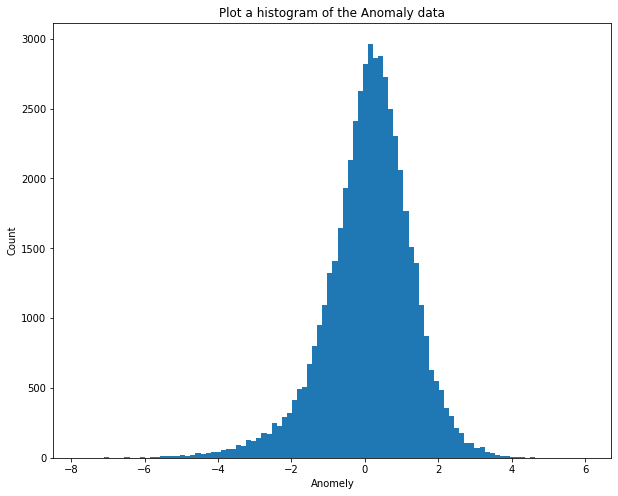

In [56]:
plt.figure(figsize=(10,8))
plt.hist(climate['Anomaly'], bins=100)
# plt.figure(figsize=(8,8))


plt.title('Plot a histogram of the Anomaly data');
plt.xlabel('Anomely');
plt.ylabel('Count');


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### 3G. Bonus 

#### (1) Recreate the plot from 3C  
Add a horizontal line at the estimated land-average temp. 




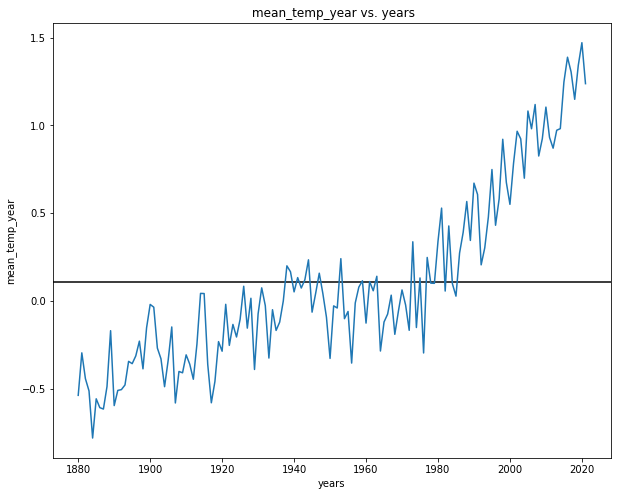

In [57]:
y = climate['Temp'].mean()
# # y.mean()
# y=climate.groupby('Year')['Anomaly'].mean()
plt.figure(figsize=(10,8))
plt.axhline(y, color ="black")
plt.plot(years,mean_temp_year);

plt.xlabel('years');
plt.ylabel('mean_temp_year');
plt.title(' mean_temp_year vs. years');


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### (2) Recreate the plot from 3E 
Color the positive bars in black and the negative bars in red.

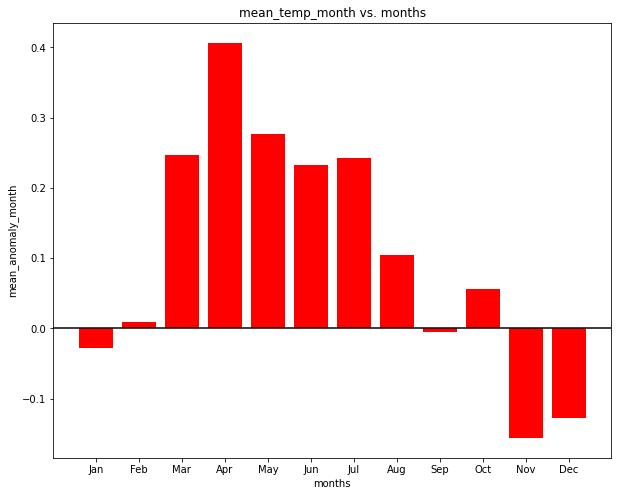

In [58]:
plt.figure(figsize=(10,8))
#plt.bar(months,mean_anomaly_month);
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.axhline(y = 0, color ="black")

Neg=['Jan','Sep','Nov','Dec']

for i in mean_anomaly_month:
  if i<0:
    plt.bar(months,mean_anomaly_month, color='red');
  else:
    plt.bar(months,mean_anomaly_month, color='black');  


plt.xlabel('months');
plt.ylabel('mean_anomaly_month');
plt.title('mean_temp_month vs. months');




<!-- END QUESTION -->

